In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_json(r'C:\Users\Anna\Downloads\1481053515_ultimate_challenge\ultimate_challenge\logins.json')

In [3]:
data

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
data.index

RangeIndex(start=0, stop=93142, step=1)

In [6]:
data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [7]:
aggregate = pd.DataFrame(data)
aggregate = aggregate.set_index('login_time')
aggregate['count']= 1
aggregate = aggregate.resample('15T').sum()
aggregate.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


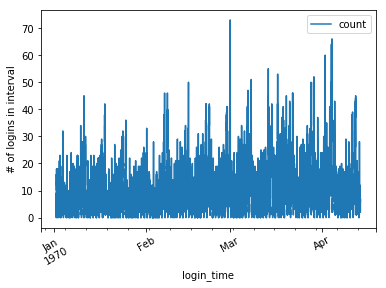

In [13]:
aggregate.plot()
plt.ylabel('# of logins in interval')
plt.xticks(rotation=30);

There's way too much going on in this graph so let's break it down by the month.

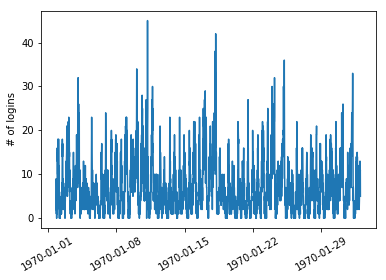

In [24]:
plt.plot(aggregate['1970-01-01': '1970-02-01'])
plt.ylabel('# of logins')
plt.xticks(rotation=30);

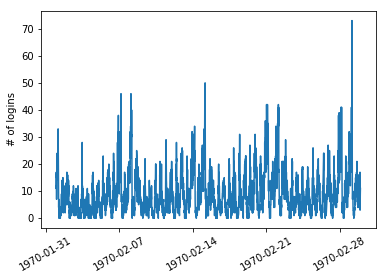

In [19]:
plt.plot(aggregate['1970-02-01': '1970-03-01'])
plt.ylabel('# of logins')
plt.xticks(rotation=30);

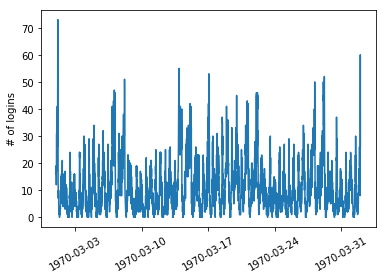

In [20]:
plt.plot(aggregate['1970-03-01': '1970-04-01'])
plt.ylabel('# of logins')
plt.xticks(rotation=30);

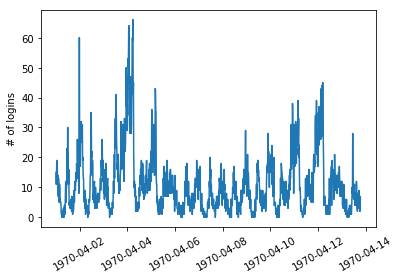

In [22]:
plt.plot(aggregate['1970-04-01': '1970-04-15'])
plt.ylabel('# of logins')
plt.xticks(rotation=30);

January seemed to have the least traffic in general, but it's hard to tell. There's still a little bit too much going on so let's massage the data a little bit more and breakdown the timestamps down. 

In [103]:
import datetime as dt
df = aggregate.reset_index()
df['login_time'] = df['login_time'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S'))
df['min'] = df['login_time'].dt.minute
df['hour'] = df['login_time'].dt.hour
df['day'] = df['login_time'].dt.day
df['week'] = df['login_time'].dt.week
df['weekday'] = df['login_time'].dt.weekday
df['month']=df['login_time'].dt.month
print(df.head())

           login_time  count  min  hour  day  week  weekday  month
0 1970-01-01 20:00:00      2    0    20    1     1        3      1
1 1970-01-01 20:15:00      6   15    20    1     1        3      1
2 1970-01-01 20:30:00      9   30    20    1     1        3      1
3 1970-01-01 20:45:00      7   45    20    1     1        3      1
4 1970-01-01 21:00:00      1    0    21    1     1        3      1


In [104]:
def week_of_month(dt):
    """ Returns the week of the month  """

    week_number= (dt-1)//7+1
    return(week_number)

df['week_of_month']=week_of_month(df['day'])
df.head()

,login_time,count,min,hour,day,week,weekday,month,week_of_month
0,1970-01-01 20:00:00,2,0,20,1,1,3,1,1
1,1970-01-01 20:15:00,6,15,20,1,1,3,1,1
2,1970-01-01 20:30:00,9,30,20,1,1,3,1,1
3,1970-01-01 20:45:00,7,45,20,1,1,3,1,1
4,1970-01-01 21:00:00,1,0,21,1,1,3,1,1


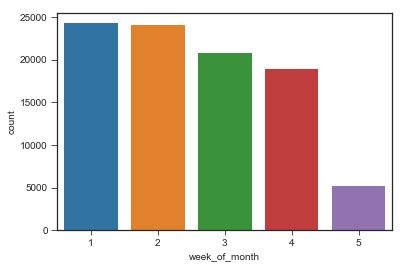

In [105]:
sns.barplot(x="week_of_month", y="count",data=df,estimator=sum,ci=None)

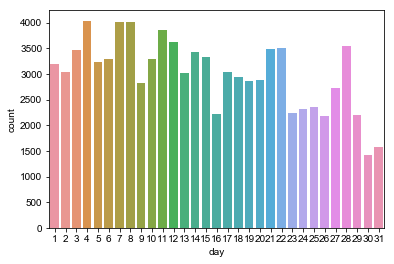

In [71]:
sns.barplot(x="day", y="count",data=df,estimator=sum,ci=None)
sns.set_style("ticks",{"xtick.major.size":5})

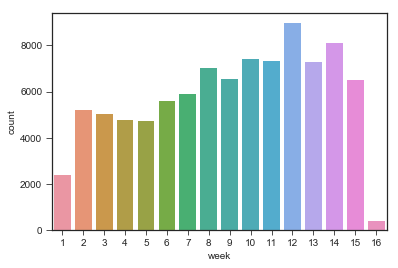

In [98]:
sns.barplot(x="week", y="count",data=df,estimator=sum,ci=None)


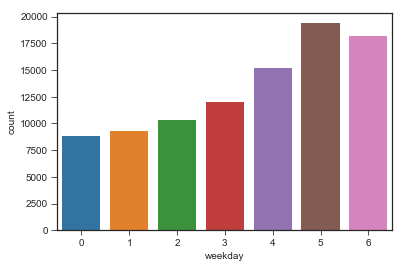

In [73]:
sns.barplot(x="weekday", y="count",data=df,estimator=sum,ci=None) #Monday is zero, Sunday is 6

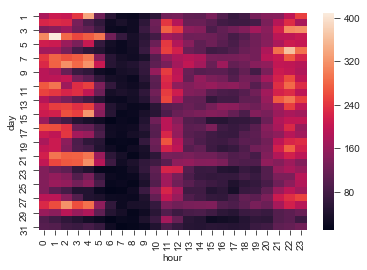

In [97]:
hours = pd.crosstab(df.day, df.hour,values=df['count'],aggfunc='sum')
sns.heatmap(hours)

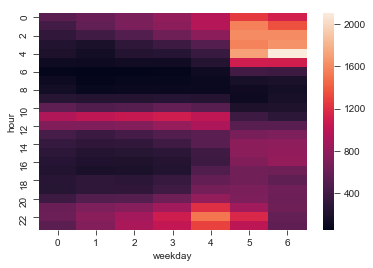

In [83]:
weekly = pd.crosstab(df.hour, df.weekday,values=df['count'],aggfunc='sum')
sns.heatmap(weekly)

Text(0.5,1,'April')

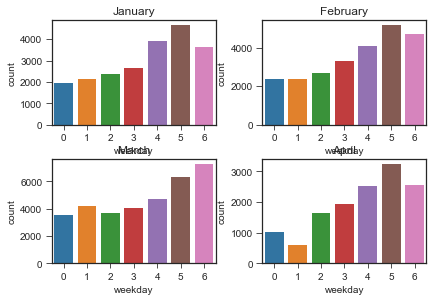

In [96]:
#Monday is zero, Sunday is 6
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2)
fig.tight_layout()
sns.barplot(x="weekday", y="count",data=df[df['month']==1],estimator=sum,ci=None,ax=ax1).set_title('January') 
sns.barplot(x="weekday", y="count",data=df[df['month']==2],estimator=sum,ci=None,ax=ax2).set_title('February')
sns.barplot(x="weekday", y="count",data=df[df['month']==3],estimator=sum,ci=None,ax=ax3).set_title('March')
sns.barplot(x="weekday", y="count",data=df[df['month']==4],estimator=sum,ci=None,ax=ax4).set_title('April')

# 2) Experiments and Metric Design

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. The key measure of success would most likely be the number of crossings that occur, or the percentage of cars that end up taking the bridge. By reimbursing all toll costs, the two cities would be able to determine the maximum drivers willing to cross over to conduct business when their own city is slow. I would choose this metric over others since it gives the most direct answer to the city about whether or not the toll is affecting intercity travel. 

2. I believe that the best experiment is one slightly outside of the parameters of the current city's experiment, and I make some assumptions. I assume that they are running this experiment because they want to eventually charge a toll but also have a frequent number of crossings onto the bridge, therefore, the ultimate goal is to maximize both the number of people that are crossing, which will result in higher revenues in respective cities, and the profit that the city makes on tolls. There are very many variables that are unknown or cannot be controlled such as why one city is busier than the other during certain times of day, i.e. groups of people work in one city and live in the other. It is in the cities' best interest, as they are the client, to maximize the revenue both in toll crossing and from business revenue in their respective cities. I would implement the experiment first by following their existing experiment of reimbursing all tolls just to get an idea of how many people would be willing to go to the other city. This number can be tested as a difference from the original amount of drivers crossing, to determine whether or not a statistical difference is obtained. This, however, is not enough to be able to claim that removing the toll is the cause, as the cities not only do not make money by temporarily removing the toll, they also lose money while reimbursing the toll. 

I would further expand on the experiment by running variable amounts of tolls over the course of a year to both generate enough data about how many people are crossing on each amount while also trying to control for differences in holidays, different times of year, etc, and taking into account the assumed decrease of crossing on the weekends for the two cities. I would then run 2 sample T-tests to dtermine whether or not the revenue difference, which would be the number of toll crossings x the toll costs is statistically significant from one group of tolls to the next. I would interpret the correct toll value to be the maximum fo both toll revenue and number of drivers crossing. 

My recommendations to the city would be the value of the toll they should set as well as numbers of how many people are expected to cross after the experiment is completed. In addition, they should be planning marketing campaigns to entice travel to the other city. The biggest caveat is the completely reimbursed toll amounts will give a skewed amount of how many people are expected to cross and implementing a toll of any amount would affect this outcome, which is why I would rather run an experiment that works best with a toll that allows each city to both to both maximize revenue from the toll and the number of visitors.

# Predictive Modeling


In [3]:
import json
with open(r'C:\Users\Anna\Downloads\1481053515_ultimate_challenge\ultimate_challenge\ultimate_data_challenge.json','r') as df:
          data2 = json.load(df)
data2 = pd.DataFrame(data2)

In [4]:
data2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


So as this shows above there are 3 columns where there is some form of missing data, let's go try to fill those in somehow. 

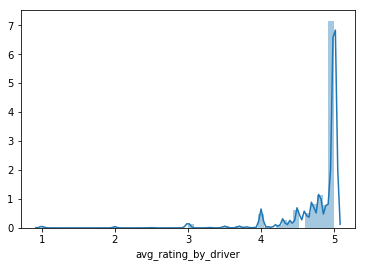

In [6]:
sns.distplot(data2[~np.isnan(data2['avg_rating_by_driver'])]['avg_rating_by_driver'])

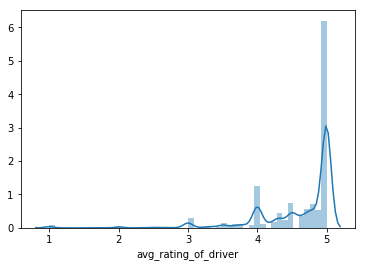

In [7]:
sns.distplot(data2[~np.isnan(data2['avg_rating_of_driver'])]['avg_rating_of_driver'])

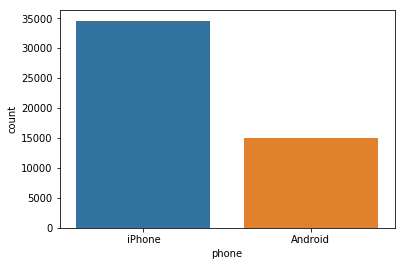

In [8]:
sns.countplot(x='phone',data=data2)

Based on the graphs of the ratings, it makes the most sense to replace with the mean without having to remove hundreds of data simply because they are missing a rating. As for the phone type, we can replace it with iPhones with a roughly 70% chance that we are correct in predicting the phone type. I'm not sure how much this will affect the model later on, however, I believe that taking the chance with the phone type is better than eliminating the data point entirely. 

In [8]:
data2['avg_rating_by_driver']=data2['avg_rating_by_driver'].fillna(data2['avg_rating_by_driver'].mean())
data2['avg_rating_of_driver']=data2['avg_rating_of_driver'].fillna(data2['avg_rating_of_driver'].mean())
data2['phone']=data2['phone'].fillna('iPhone')

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Now let's change the dates to datetimes to make it easier to track time change. 

In [12]:
data2['last_trip_date']=pd.to_datetime(data2['last_trip_date'])
data2['signup_date']=pd.to_datetime(data2['signup_date'])

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
data2.avg_dist.describe()

count    50000.000000
mean         5.796827
std          5.707357
min          0.000000
25%          2.420000
50%          3.880000
75%          6.940000
max        160.960000
Name: avg_dist, dtype: float64

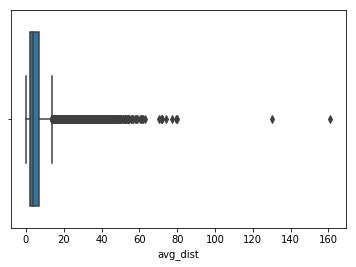

In [15]:
sns.boxplot(data2.avg_dist)

In [20]:
plottable_features = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','surge_pct','trips_in_first_30_days','weekday_pct']

In [18]:
#plt.plot(data2['last_trip_date'])

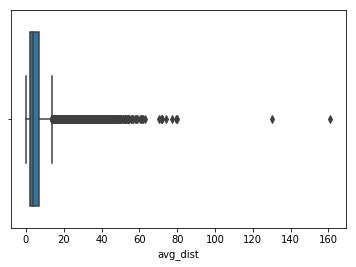

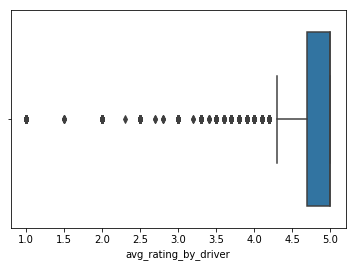

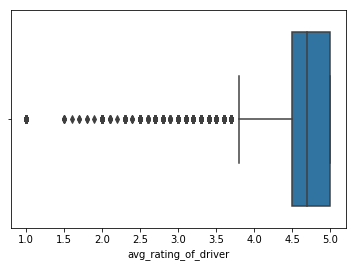

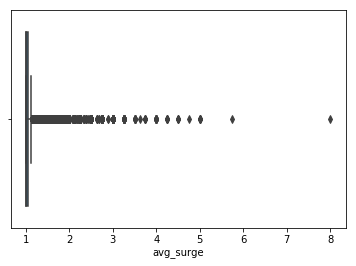

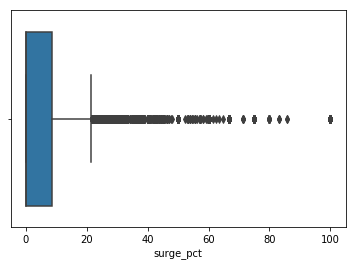

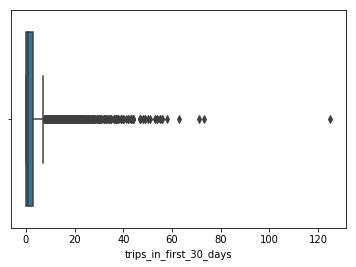

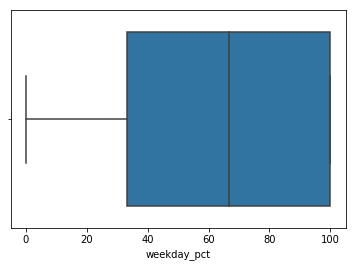

In [22]:
for each in plottable_features:
    sns.boxplot(data2[each])
    plt.show();

In [9]:
df = data2[data2['avg_dist']<60]
df= df[df['avg_rating_by_driver']>3]
df=df[df['avg_rating_of_driver']>3]
df= df[df['avg_surge']<3]
df= df[df['surge_pct']<50]
df=df[df['trips_in_first_30_days']<50]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44566 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  44566 non-null float64
avg_rating_by_driver      44566 non-null float64
avg_rating_of_driver      44566 non-null float64
avg_surge                 44566 non-null float64
city                      44566 non-null object
last_trip_date            44566 non-null object
phone                     44566 non-null object
signup_date               44566 non-null object
surge_pct                 44566 non-null float64
trips_in_first_30_days    44566 non-null int64
ultimate_black_user       44566 non-null bool
weekday_pct               44566 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.1+ MB


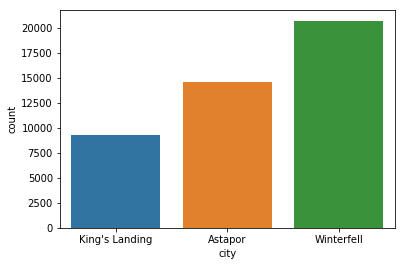

In [42]:
sns.countplot(x="city",data=df)

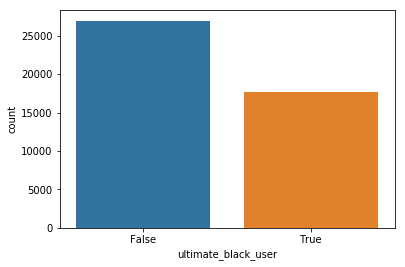

In [43]:
sns.countplot(x="ultimate_black_user",data=df)

In [45]:
corrmatrix = df.corr()
corrmatrix

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.125736,0.052690,-0.132657,-0.159205,-0.152623,0.025408,0.103532
avg_rating_by_driver,0.125736,1.000000,0.125272,-0.077403,-0.077484,-0.131352,-0.020932,0.021224
avg_rating_of_driver,0.052690,0.125272,1.000000,-0.059979,-0.048162,-0.069164,-0.018700,0.005756
avg_surge,-0.132657,-0.077403,-0.059979,1.000000,0.836154,0.162222,0.019309,-0.069743
surge_pct,-0.159205,-0.077484,-0.048162,0.836154,1.000000,0.191472,0.011177,-0.081212
trips_in_first_30_days,-0.152623,-0.131352,-0.069164,0.162222,0.191472,1.000000,0.103832,0.041865
ultimate_black_user,0.025408,-0.020932,-0.018700,0.019309,0.011177,0.103832,1.000000,0.021376
weekday_pct,0.103532,0.021224,0.005756,-0.069743,-0.081212,0.041865,0.021376,1.000000


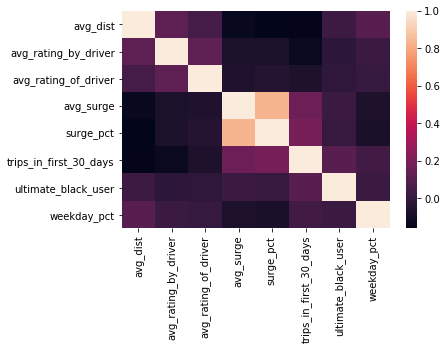

In [46]:
sns.heatmap(corrmatrix)

Now to answer the question of how many users were retained, meaning active in the preceding 30 days, we need to find out with the last date available in the dataset.

In [5]:
df.sort_values('last_trip_date',ascending=False).head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
24948,3.62,4.9,5.0,1.06,King's Landing,2014-07-01,iPhone,2014-01-18,18.5,5,False,55.6
40063,3.26,4.7,4.3,1.03,Winterfell,2014-07-01,iPhone,2014-01-06,2.4,18,False,80.7
33555,2.66,4.9,5.0,1.07,King's Landing,2014-07-01,iPhone,2014-01-16,9.6,11,True,73.1
23378,3.77,4.7,5.0,1.15,Winterfell,2014-07-01,iPhone,2014-01-20,7.7,7,True,69.2
29669,4.12,4.7,4.9,1.00,Astapor,2014-07-01,iPhone,2014-01-11,0.0,2,True,70.6


So since the last date is July 1st, 2014, I will make the assumption that this was the day the data was pulled and use 30 days prior to this as the cutoff point for retention. 

In [10]:
print('{:.2f}% are retained users'.format(len(df[df['last_trip_date'] >= '2014-06-01'])/len(df)*100))

39.45% are retained users


In [11]:
df['signup_date'].describe()

count          44566
unique            31
top       2014-01-18
freq            2526
Name: signup_date, dtype: object

So the dataset comprises of only people that signed up in January meaning the percentage of users that I calculated above is the percentage retained after 6 months. We have everything that we need to train a model with this information. I will be splitting the data into train/test to try to predict if users will be retained.

In [12]:
df['retained'] = df['last_trip_date'].apply(lambda x: 1 if x >= '2014-06-01' else 0)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [14]:
df = df.drop('signup_date', axis=1)
df = df.drop('last_trip_date', axis=1)

In [15]:
df2 = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,0,1,1,0,1,0


In [31]:
from sklearn.model_selection import train_test_split
X, y = df2.drop(['retained'], axis=1), df2['retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[4285 1141]
 [1094 2394]]
             precision    recall  f1-score   support

          0       0.80      0.79      0.79      5426
          1       0.68      0.69      0.68      3488

avg / total       0.75      0.75      0.75      8914

0.7492708099618578


The model is 74.9% accurate with the number of estimators. I used Random Forest Classification due to wanting a classifier for this data, for grouping whether a user would be retained or not. There are things within the classifier that can be fine tuned to slightly improve the accuracy including changing the train/test size. Due to the nature of the data in which there was only about 6 months of data total, I believe that the model works though could benefit from more robust data over time rather than 6 months of data for 6 months of retention. 

In [28]:
feature_importance = pd.DataFrame(rfc.feature_importances_).T
feature_importance.columns = list(X.columns)
feature_importance

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.305059,0.104106,0.075989,0.075222,0.082975,0.08345,0.136191,0.015369,0.046239,0.010965,0.018861,0.019239,0.013579,0.012756


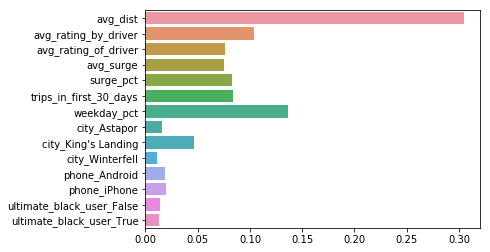

In [29]:
sns.barplot(y=X.columns, x=rfc.feature_importances_)

The most important features in the dataset seem to be average distance, average rating by the driver, the percentage of weekday users as well as surge percentage coming up right behind. King's Landing as a city seems much more important than the other cities as well. 

To Ultimate, I would recommend looking at improving the advertising in King's Landing as compared to other cities, it seems to be more important, as well as looking at the highly correlated factors, surge, and trips in the first 30 days. Ultimate should be looking at users with trips taken during surge to see how they could retain those users up to and including changing surge amounts or times, as well as how users who take fewer trips in the first 30 days could be encouraged to stay using the app.